# The NBA Player Similarity Project
### Author: Matt Murray

## Load the Data
We're loading the data from Basketball-Reference.com. We need two datasets:
1. Table of the best players in the NBA (ranked by Player Efficiency Rating).
2. Table of all of the per game stats for each player in the NBA

The two links of interest for us are 
1. https://www.basketball-reference.com/leagues/NBA_2019_advanced.html#advanced_stats::per and 
2. https://www.basketball-reference.com/leagues/NBA_2019_per_poss.html. 

They contain the information we need!

### Table of Best Players in the NBA (PER TABLE DATA)

In [1]:
from IPython.display import HTML, display_html
import tabulate
import pandas as pd

PER_TABLE = [
            ["Giannis Antetokounmpo", 30.89],
            ["James Harden", 30.57],
            ["Anthony Davis", 30.26],
            ["Karl-Anthony Towns", 26.32],
            ["Nikola Jokić", 26.31],
            ["Joel Embiid", 26.14],
            ["Kawhi Leonard", 25.82],
            ["LeBron James", 25.58],
            ["Nikola Vučević", 25.45],
            ["Rudy Gobert", 24.56],
            ["Stephen Curry", 24.4],
            ["Kyrie Irving", 24.3],
            ["Kevin Durant", 24.2],
            ["Clint Capela", 23.8],
            ["Damian Lillard", 23.7],
]

PER_TABLE = pd.DataFrame(PER_TABLE, columns = ["Player", "PER"])

# More information on Player Efficiency Rating: https://en.wikipedia.org/wiki/Player_efficiency_rating
PER_INFO = pd.read_html("https://en.wikipedia.org/wiki/Player_efficiency_rating")[0]
PER_INFO.columns = ["Player Type", "PER"]


# Render the Table
PER_TABLE_styler = PER_TABLE.T.style.set_table_attributes("style='display:inline'").set_caption('Best Players by PER')

display_html(PER_TABLE_styler._repr_html_(), raw=True) # Display the PER_INFO table vertially

# Based on the PER ranges below, all of these players are definitely all stars, with some of them being MVP candidates. Giannis won in 2019!

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Player,Giannis Antetokounmpo,James Harden,Anthony Davis,Karl-Anthony Towns,Nikola Jokić,Joel Embiid,Kawhi Leonard,LeBron James,Nikola Vučević,Rudy Gobert,Stephen Curry,Kyrie Irving,Kevin Durant,Clint Capela,Damian Lillard
PER,30.890000,30.570000,30.260000,26.320000,26.310000,26.140000,25.820000,25.580000,25.450000,24.560000,24.400000,24.300000,24.200000,23.800000,23.700000


In [2]:
# More information on Player Efficiency Rating: https://en.wikipedia.org/wiki/Player_efficiency_rating
PER_INFO = pd.read_html("https://en.wikipedia.org/wiki/Player_efficiency_rating")[0]
PER_INFO.columns = ["Player Type", "PER"]

PER_INFO_t_styler = PER_INFO.T.style.set_table_attributes("style='display:inline'").set_caption('Player type by PER')
display_html(PER_INFO_t_styler._repr_html_(), raw=True) # Display the PER_INFO table horizontally

,0,1,2,3,4,5,6,7,8,9,10,11,12
Player Type,All-time great season,Runaway MVP candidate,Strong MVP candidate,Weak MVP candidate,Definite All-Star,Borderline All-Star,Second offensive option,Third offensive option,Slightly above-average player,Rotation player,Non-rotation player,Fringe roster player,Player who won't stick in the league
PER,35.0+,30.0–35.0,27.5–30.0,25.0–27.5,22.5–25.0,20.0–22.5,18.0–20.0,16.5–18.0,15.0–16.5,13.0–15.0,11.0–13.0,9.0–11.0,0–9.0


### Player Stats (Table Per Game)

In [3]:
# NBA season we will be analyzing
year = 2019

# URL page we will scraping 
URL = f"https://www.basketball-reference.com/leagues/NBA_{year}_per_minute.html"

data = pd.read_html(URL)[0]

print(data.columns)
names = data['Player']
positions = data['Pos']

data

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Álex Abrines,SG,25,OKC,31,2,588,3.4,9.6,...,.923,0.3,2.6,2.9,1.2,1.0,0.4,0.9,3.2,10.1
1,2,Quincy Acy,PF,28,PHO,10,0,123,1.2,5.3,...,.700,0.9,6.4,7.3,2.3,0.3,1.2,1.2,7.0,5.0
2,3,Jaylen Adams,PG,22,ATL,34,1,428,3.2,9.3,...,.778,0.9,4.1,5.0,5.5,1.2,0.4,2.4,3.8,9.1
3,4,Steven Adams,C,25,OKC,80,80,2669,6.5,10.9,...,.500,5.3,5.0,10.3,1.7,1.6,1.0,1.8,2.8,14.9
4,5,Bam Adebayo,C,21,MIA,82,28,1913,5.3,9.1,...,.735,3.1,8.1,11.2,3.5,1.3,1.2,2.3,3.8,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,528,Tyler Zeller,C,29,MEM,4,1,82,7.0,12.3,...,.778,4.0,4.0,7.9,1.3,0.4,1.3,1.8,7.0,20.2
730,529,Ante Žižić,C,22,CLE,59,25,1082,6.1,11.0,...,.705,3.6,7.1,10.6,1.8,0.4,0.7,2.0,3.8,15.3
731,530,Ivica Zubac,C,21,TOT,59,37,1040,7.3,13.1,...,.802,4.0,8.6,12.5,2.2,0.5,1.8,2.4,4.7,18.2
732,530,Ivica Zubac,C,21,LAL,33,12,516,7.8,13.5,...,.864,3.8,7.5,11.3,1.7,0.3,1.9,2.3,5.1,19.6


In [4]:
import warnings
warnings.filterwarnings('ignore') # For a cleaner notebook. Note book warnings are coming from repeatedly updating types in data. That's no problem!

data = data[data["Pos"]!="Pos"] # Remove rows without player data (header rows are mixed in data),

data.fillna(0)

# Convert str or object to float for numic types
num_features = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
for feature in num_features:
    data[feature] = pd.to_numeric(data[feature], downcast="float")

data

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Álex Abrines,SG,25.0,OKC,31.0,2.0,588.0,3.4,9.6,...,0.923,0.3,2.6,2.9,1.2,1.0,0.4,0.9,3.2,10.100000
1,2,Quincy Acy,PF,28.0,PHO,10.0,0.0,123.0,1.2,5.3,...,0.700,0.9,6.4,7.3,2.3,0.3,1.2,1.2,7.0,5.000000
2,3,Jaylen Adams,PG,22.0,ATL,34.0,1.0,428.0,3.2,9.3,...,0.778,0.9,4.1,5.0,5.5,1.2,0.4,2.4,3.8,9.100000
3,4,Steven Adams,C,25.0,OKC,80.0,80.0,2669.0,6.5,10.9,...,0.500,5.3,5.0,10.3,1.7,1.6,1.0,1.8,2.8,14.900000
4,5,Bam Adebayo,C,21.0,MIA,82.0,28.0,1913.0,5.3,9.1,...,0.735,3.1,8.1,11.2,3.5,1.3,1.2,2.3,3.8,13.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,528,Tyler Zeller,C,29.0,MEM,4.0,1.0,82.0,7.0,12.3,...,0.778,4.0,4.0,7.9,1.3,0.4,1.3,1.8,7.0,20.200001
730,529,Ante Žižić,C,22.0,CLE,59.0,25.0,1082.0,6.1,11.0,...,0.705,3.6,7.1,10.6,1.8,0.4,0.7,2.0,3.8,15.300000
731,530,Ivica Zubac,C,21.0,TOT,59.0,37.0,1040.0,7.3,13.1,...,0.802,4.0,8.6,12.5,2.2,0.5,1.8,2.4,4.7,18.200001
732,530,Ivica Zubac,C,21.0,LAL,33.0,12.0,516.0,7.8,13.5,...,0.864,3.8,7.5,11.3,1.7,0.3,1.9,2.3,5.1,19.600000


In [5]:
"""
Data Cleaning and Preprocessing (Per Game Stats)
stats_matrix: Every player is a vector of features
"""

import warnings
warnings.filterwarnings('ignore') # For a cleaner notebook. Note book warnings are coming from repeatedly updating stats_matrix. That's no problem!

# data = data[data["Pos"]!="Pos"] # Remove rows without player data (header rows are mixed in data)
names = data['Player']
positions = data['Pos']

features = ['Pos', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

stats_matrix = data[features]

# Convert Pos to numerical data: PG-1, SG-2, SF-3, PF-4, C-5
po_replacements = {
    "PG":1,
    "SG":2,
    "SF":3,
    "PF":4,
    "C":5,
}
for pos in po_replacements.keys():
    stats_matrix.replace(pos, po_replacements[pos], inplace=True)

# Convert the "cross-positions" too
import itertools
for pos1, pos2 in list(itertools.combinations(po_replacements.keys(), 2)):
    avg_pos = (po_replacements[pos1]+po_replacements[pos2]) / 2
    stats_matrix.replace(f"{pos1}-{pos2}", avg_pos, inplace=True)
    stats_matrix.replace(f"{pos2}-{pos1}", avg_pos, inplace=True)
stats_matrix

,Pos,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2.0,25.0,31.0,2.0,588.0,3.4,9.6,0.357,2.5,7.8,...,0.923,0.3,2.6,2.9,1.2,1.0,0.4,0.9,3.2,10.100000
1,4.0,28.0,10.0,0.0,123.0,1.2,5.3,0.222,0.6,4.4,...,0.700,0.9,6.4,7.3,2.3,0.3,1.2,1.2,7.0,5.000000
2,1.0,22.0,34.0,1.0,428.0,3.2,9.3,0.345,2.1,6.2,...,0.778,0.9,4.1,5.0,5.5,1.2,0.4,2.4,3.8,9.100000
3,5.0,25.0,80.0,80.0,2669.0,6.5,10.9,0.595,0.0,0.0,...,0.500,5.3,5.0,10.3,1.7,1.6,1.0,1.8,2.8,14.900000
4,5.0,21.0,82.0,28.0,1913.0,5.3,9.1,0.576,0.1,0.3,...,0.735,3.1,8.1,11.2,3.5,1.3,1.2,2.3,3.8,13.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,5.0,29.0,4.0,1.0,82.0,7.0,12.3,0.571,0.0,0.0,...,0.778,4.0,4.0,7.9,1.3,0.4,1.3,1.8,7.0,20.200001
730,5.0,22.0,59.0,25.0,1082.0,6.1,11.0,0.553,0.0,0.0,...,0.705,3.6,7.1,10.6,1.8,0.4,0.7,2.0,3.8,15.300000
731,5.0,21.0,59.0,37.0,1040.0,7.3,13.1,0.559,0.0,0.0,...,0.802,4.0,8.6,12.5,2.2,0.5,1.8,2.4,4.7,18.200001
732,5.0,21.0,33.0,12.0,516.0,7.8,13.5,0.580,0.0,0.0,...,0.864,3.8,7.5,11.3,1.7,0.3,1.9,2.3,5.1,19.600000


### Compute the Similarity Values

In [6]:
from scipy.spatial.distance import squareform, pdist
import numpy as np

# From scipy, for two vectors u and v, the cos_similarity = 1 - u.v/(||u||*||v||) => 0=Identical, 1=Orthogonal (No match)
similarities = pd.DataFrame(
    squareform(pdist(stats_matrix, metric = 'cosine')),
    columns = names,
    index = names
)
similarities

Player,Álex Abrines,Quincy Acy,Jaylen Adams,Steven Adams,Bam Adebayo,Deng Adel,DeVaughn Akoon-Purcell,LaMarcus Aldridge,Rawle Alkins,Grayson Allen,...,Thaddeus Young,Trae Young,Cody Zeller,Tyler Zeller,Tyler Zeller,Tyler Zeller,Ante Žižić,Ivica Zubac,Ivica Zubac,Ivica Zubac
Player,,,,,,,,,,,,,,,,,,,,,
Álex Abrines,0.000000,0.021975,0.000534,0.001419,0.000832,0.003776,0.459679,0.001269,0.021001,0.001665,...,0.001324,0.001387,0.001075,0.071787,NaN,NaN,NaN,NaN,NaN,NaN
Quincy Acy,0.021975,0.000000,0.018963,0.031298,0.029643,0.009870,0.325313,0.030435,0.007441,0.018243,...,0.030675,0.031341,0.027735,0.027361,NaN,NaN,NaN,NaN,NaN,NaN
Jaylen Adams,0.000534,0.018963,0.000000,0.003055,0.002041,0.002161,0.442772,0.002834,0.017557,0.000702,...,0.002864,0.002918,0.002228,0.066835,NaN,NaN,NaN,NaN,NaN,NaN
Steven Adams,0.001419,0.031298,0.003055,0.000000,0.000210,0.008616,0.491873,0.000017,0.029415,0.005031,...,0.000012,0.000033,0.000202,0.084742,NaN,NaN,NaN,NaN,NaN,NaN
Bam Adebayo,0.000832,0.029643,0.002041,0.000210,0.000000,0.007420,0.487073,0.000212,0.027828,0.003860,...,0.000225,0.000244,0.000351,0.082881,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tyler Zeller,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
Ante Žižić,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
Ivica Zubac,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


### Get the 10 Most similar Players

In [7]:
top_players = PER_TABLE["Player"]
tables = []
N = 20
for player in top_players:
    top = similarities[player].nsmallest(N)
    tables.append(top.sort_values())

In [8]:
from IPython.display import display

def display_side_by_side(args):
    """
    Printing dataframes side by side. Source
    : https://www.codegrepper.com/code-examples/whatever/python+jupyter+display+two+dataframe+charts+side+by+side. 
    Very Nice!
    """
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)


display_side_by_side(list(map(pd.DataFrame, tables)))
    

,Giannis Antetokounmpo
Player,
Giannis Antetokounmpo,0.000000
Joel Embiid,0.000005
Karl-Anthony Towns,0.000011
John Collins,0.000012
Brandon Ingram,0.000013
Kawhi Leonard,0.000014
Lauri Markkanen,0.000016
Nikola Vučević,0.000017
Nikola Jokić,0.000018


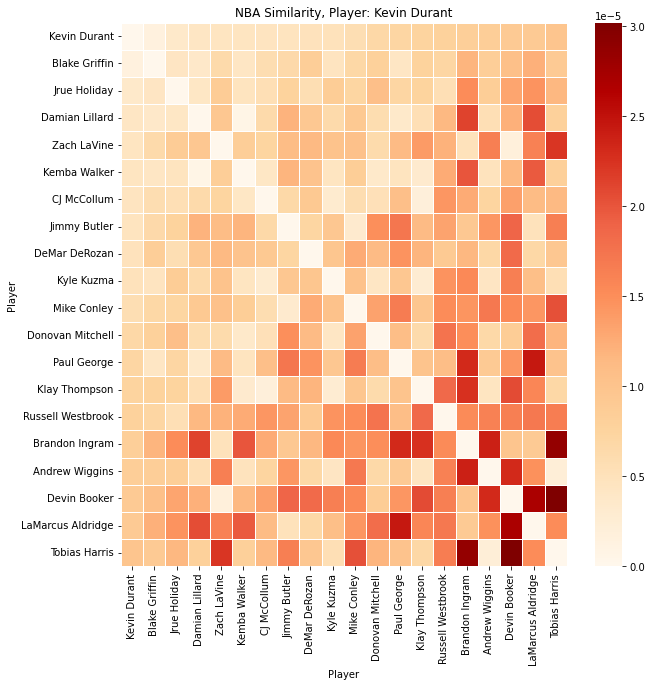

In [9]:
# Heatmap of Similarity for the players most similar to top Player

from matplotlib import pyplot as plt
import seaborn as sns

def get_top_players(player):
    """Check if the player is one the top players and return player's table"""
    for i, table in enumerate(tables):
        name = table.index[0]
        if name==player:
            return table.index
        
def similarity(player): # I'm recomputing the similarity, it's true that it's possible to just retrieve the values from the computation before
    """Compute the similarity for that player's table"""
    players = get_top_players(player)
    index_from_player = lambda name: int(data[data['Player']==name].index.values[0])
    somestats = stats_matrix.loc[[index_from_player(name) for name in list(players)]]

    pairwise = pd.DataFrame(
        squareform(pdist(somestats, metric = 'cosine')),
        columns = players,
        index = players
    )
    return pairwise

def heat_map(player):
    "Plot the heat map"
    plt.figure(figsize=(10,10))
    plt.title(f"NBA Similarity, Player: {player}")
    plt.xlabel("players")
    plt.ylabel("players")
    sns.heatmap(
        similarity(player),
        cmap='OrRd',
        linewidth=1
    )
    
heat_map(player="Kevin Durant")